# Objectives

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

In [10]:
#Install and Import require libraries
%pip install seaborn
%pip install folium

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


In [11]:
import requests
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Download the CSV file using requests
response = requests.get(URL)

# Check if the download was successful
if response.status_code == 200:
    # Convert the CSV content to a pandas DataFrame
    text = StringIO(response.text)
    df = pd.read_csv(text)
    print('Data downloaded and read into a dataframe!')
else:
    print('Failed to download the data.')

Data downloaded and read into a dataframe!


In [12]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [13]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


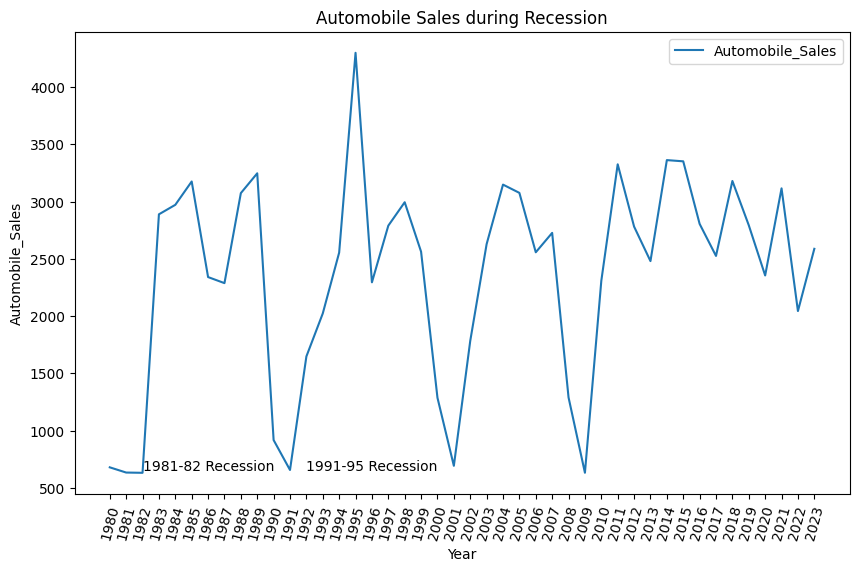

In [14]:
df_line = df.groupby(['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Automobile_Sales')
plt.title('Automobile Sales during Recession')
plt.text(1982, 650, '1981-82 Recession')
plt.text(1992, 650, '1991-95 Recession')
plt.legend()
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

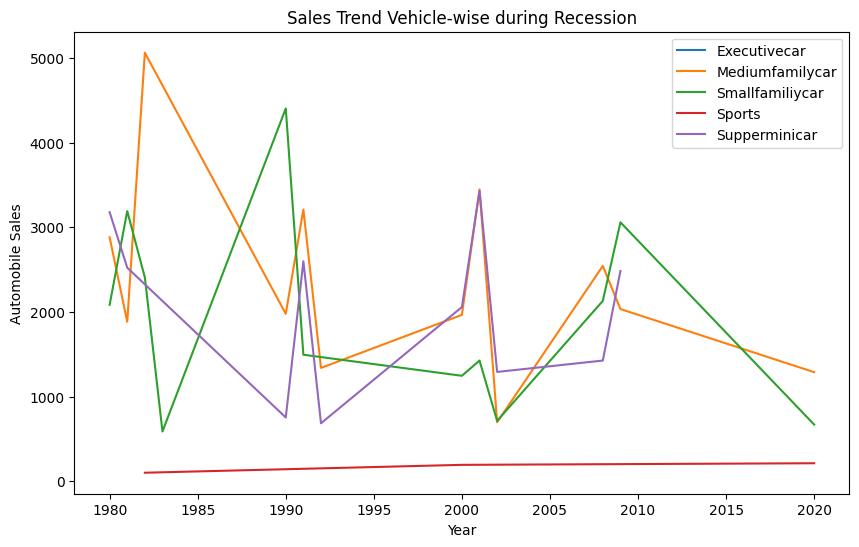

In [15]:
df_Recession = df[df['Recession']==1]
df_year_Vehicle = df_Recession.groupby(['Year', 'Vehicle_Type'], as_index = False)['Automobile_Sales'].sum()
df_year_Vehicle.set_index('Year', inplace=True)
df_year_Vehicle = df_year_Vehicle.groupby(['Vehicle_Type'])['Automobile_Sales']
plt.figure(figsize=(10,6))
df_year_Vehicle.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

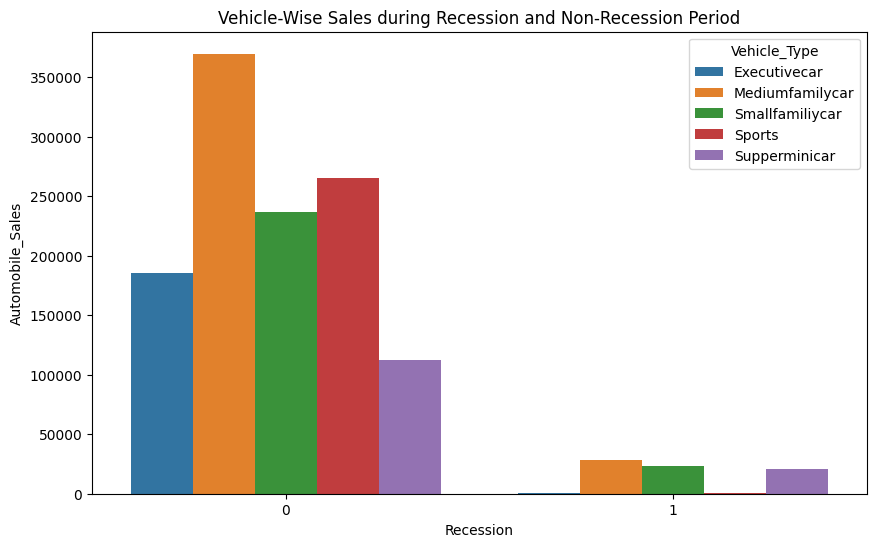

In [16]:
df_Re_NonRe = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.barplot(data=df_Re_NonRe, x='Recession', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


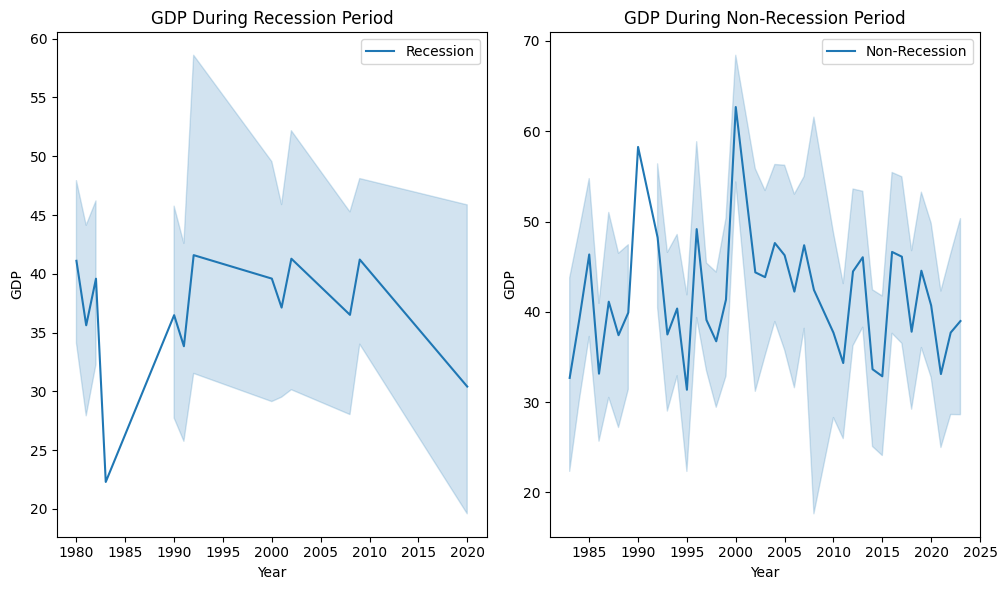

In [17]:
rec_df = df[df['Recession']==1]
non_rec_df = df[df['Recession']==0]

plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
sns.lineplot(data = rec_df, x='Year', y='GDP', label='Recession')
plt.title('GDP During Recession Period')

plt.subplot(1, 2, 2)
sns.lineplot(data = non_rec_df, x='Year', y='GDP', label='Non-Recession')
plt.title('GDP During Non-Recession Period')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


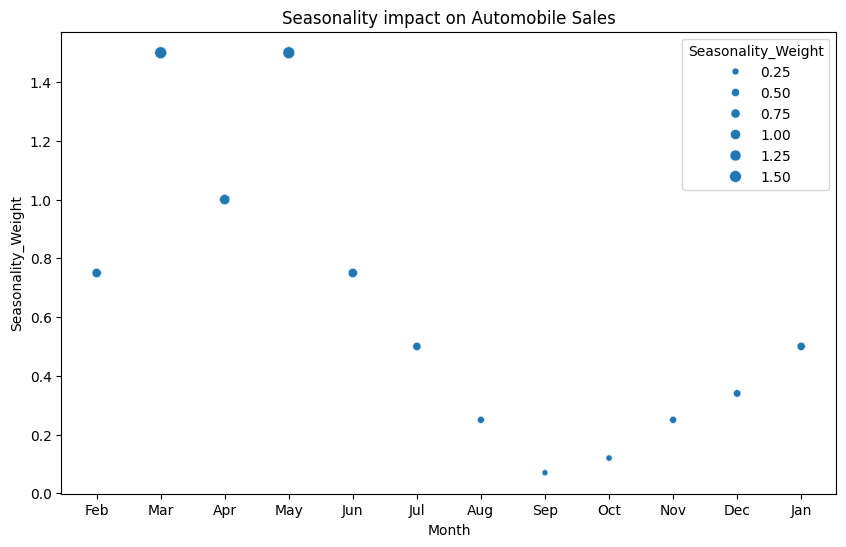

In [19]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

plt.figure(figsize=(10, 6))

sns.scatterplot(data=non_rec_data, x='Month', y='Seasonality_Weight', size=size)

plt.title('Seasonality impact on Automobile Sales')

plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


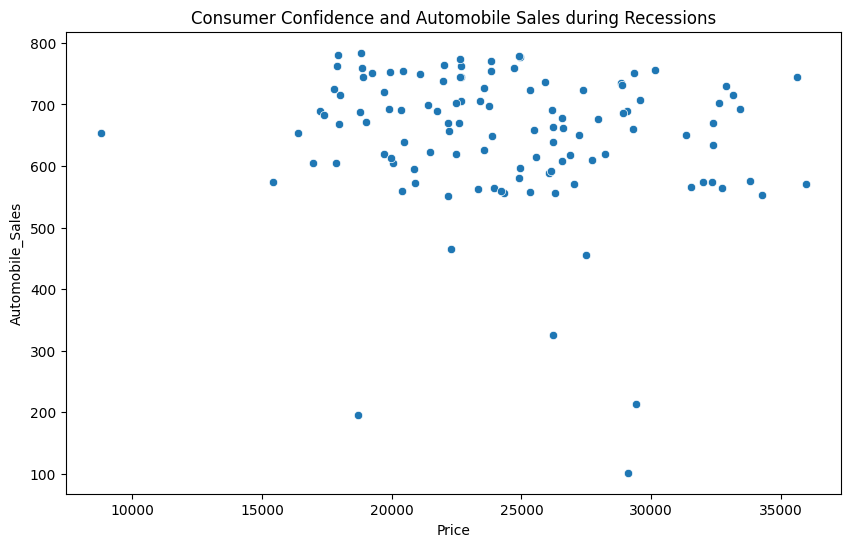

In [20]:
rec_df = df[df['Recession']==1]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=rec_df, x='Price', y='Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


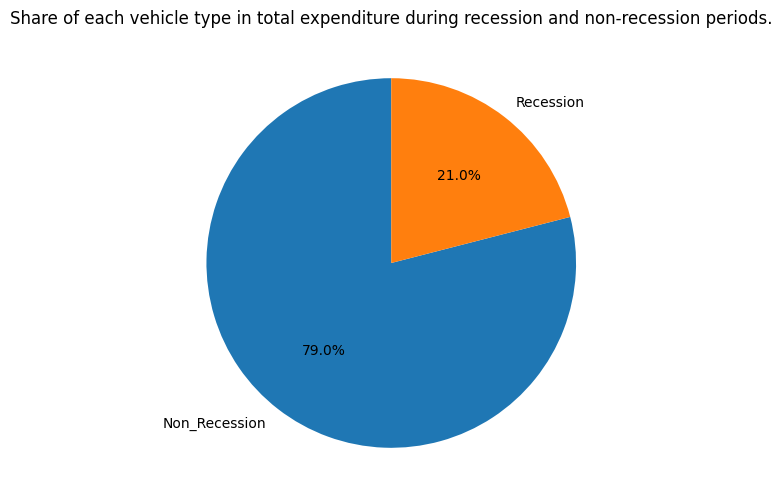

In [22]:
Pie_df = df.groupby(['Recession'])['Advertising_Expenditure'].sum().reset_index()
size = Pie_df['Advertising_Expenditure']
label = ['Non_Recession', 'Recession']
plt.figure(figsize=(10, 6))

plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Share of each vehicle type in total expenditure during recession and non-recession periods.')
plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


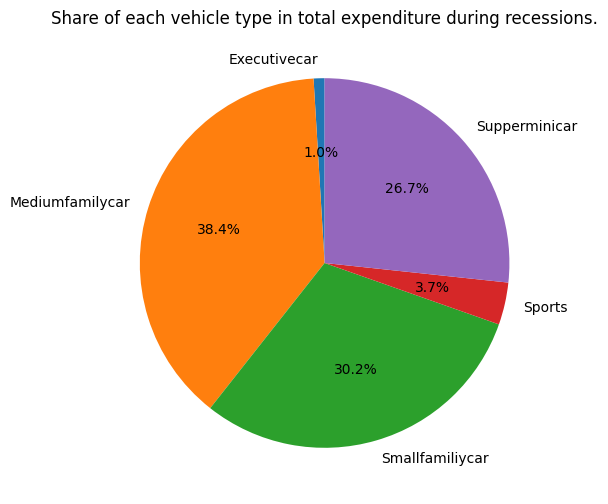

In [23]:
rec_data = df[df['Recession'] == 1]
Pie_df = rec_data.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum().reset_index()
size = Pie_df['Advertising_Expenditure']
label = Pie_df['Vehicle_Type']
plt.figure(figsize=(10, 6))

plt.pie(size, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Share of each vehicle type in total expenditure during recessions.')
plt.show()

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


/tmp/ipykernel_16952/245615540.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=rec_df, x='Year', y='Automobile_Sales',


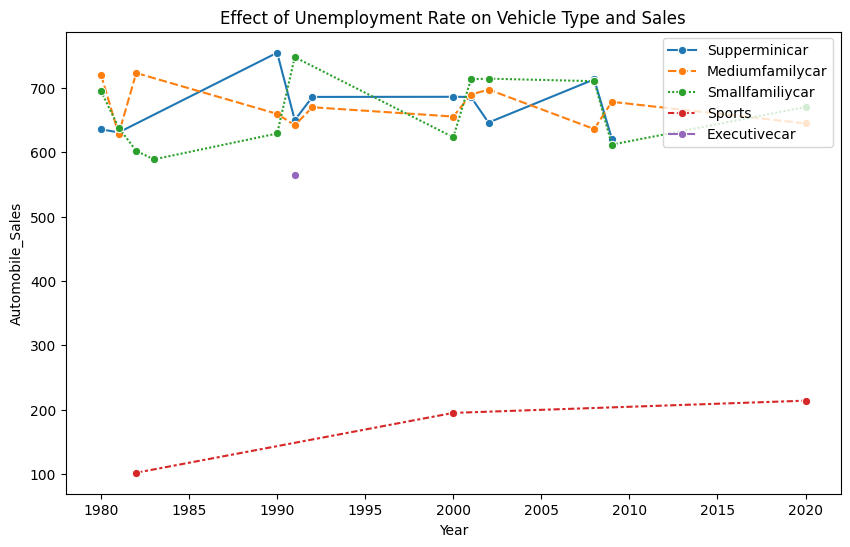

In [24]:
rec_df = df[df['Recession']==1]
plt.figure(figsize=(10, 6))
sns.lineplot(data=rec_df, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.77,0.75))
plt.show()

### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [27]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"File '{filename}' downloaded successfully.")
    else:
        print(f"Failed to download file from '{url}'. Status code: {response.status_code}")

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, "us-states.json")

File 'us-states.json' downloaded successfully.


In [29]:
    # Filter the data for the recession period and specific cities
    recession_data = df[df['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1